Upload the Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 21-chatbots-evaluating-their-impact-on-university.ipynb to 21-chatbots-evaluating-their-impact-on-university.ipynb


Load the Dataset

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Step 1: Load the diabetes dataset (built-in healthcare-like dataset)
data = load_diabetes()

# Step 2: Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # This is the outcome variable (disease progression)

# Step 3: Preview the dataset
print("Sample data:")
print(df.head())

# Step 4: Split the dataset into features and target
X = df.drop('target', axis=1)
y = df['target']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now you can use X_train_scaled and y_train for training an AI model
print("\nTransformed training data:")
print(X_train_scaled[:5])


Sample data:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Transformed training data:
[[ 1.49836523  1.06136988  0.21990201  1.13887373  0.72847289  1.05589332
  -0.82445065  0.71103773  0.54748197 -0.06144896]
 [-0.22885822  1.06136988 -0.41936607 -0.71059105 -0.4249289   0.27242452
  -1.52979055  1.4842858  -0.01975653  0.36723647]
 [ 0.0

Data Exploration

In [ ]:
#Display first few rows
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# Shape of the dataset
print("Shape:", df.shape)
# Column names
print("Columns:", df.columns.tolist())
# Data types and non-null values
df.info()
# Summary statistics for numeric features
df.describe()

Shape: (442, 11)
Columns: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


Check for missing Values and Duplicates

In [ ]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
Duplicate rows: 0


Visualize a Few Features

Dataset shape: (442, 11)
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


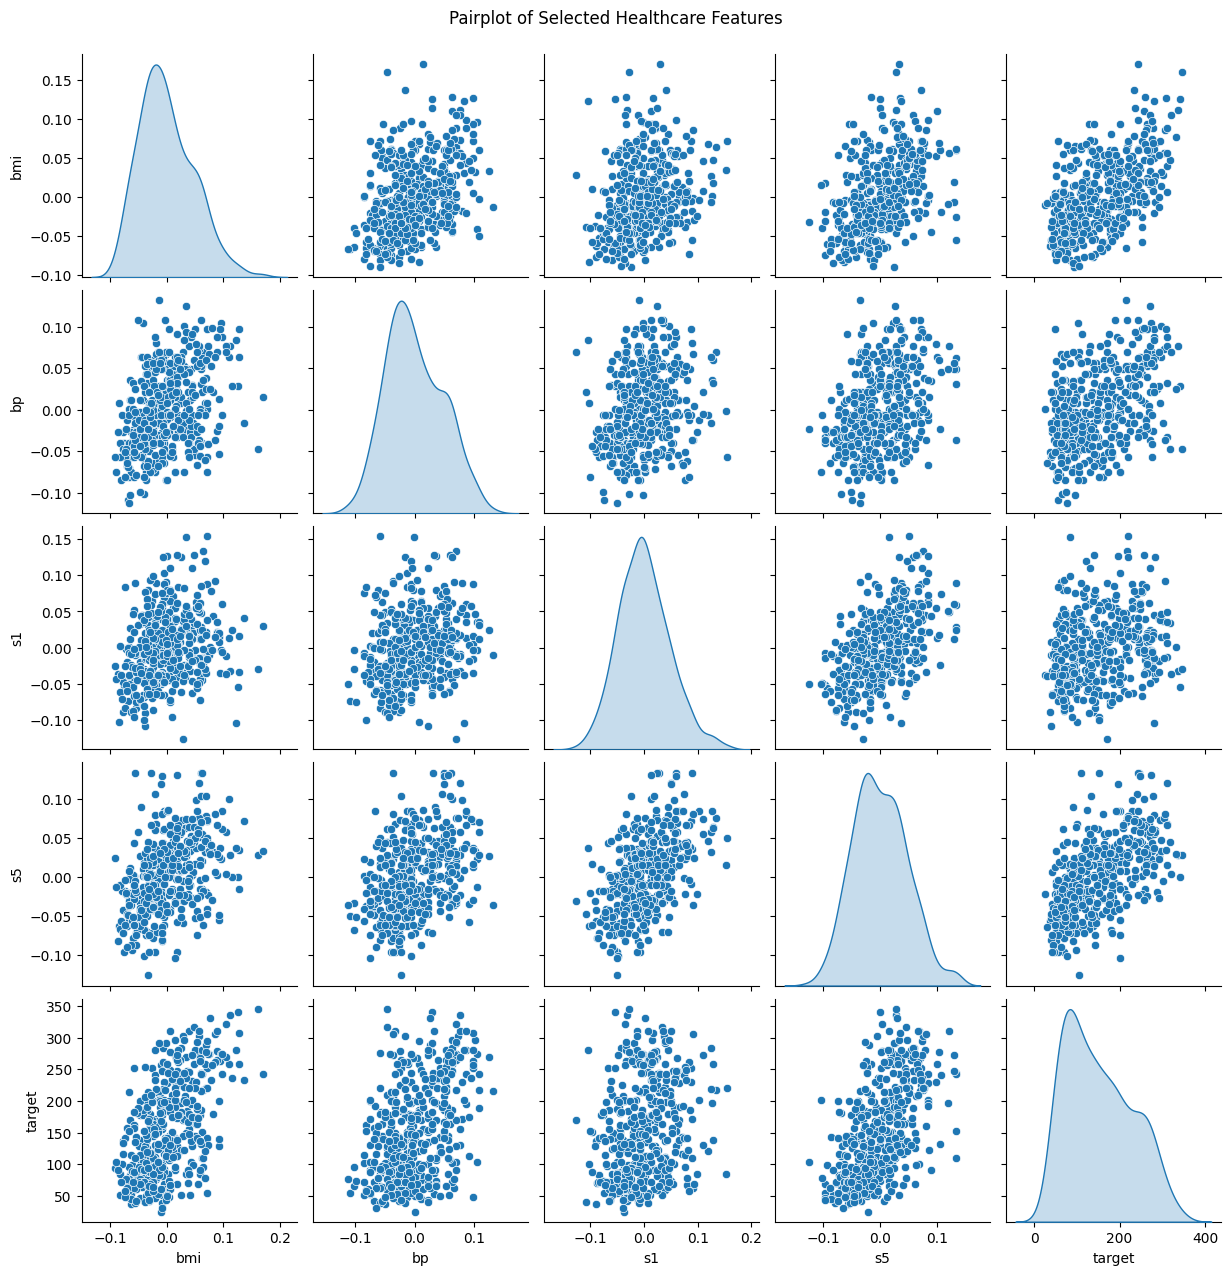

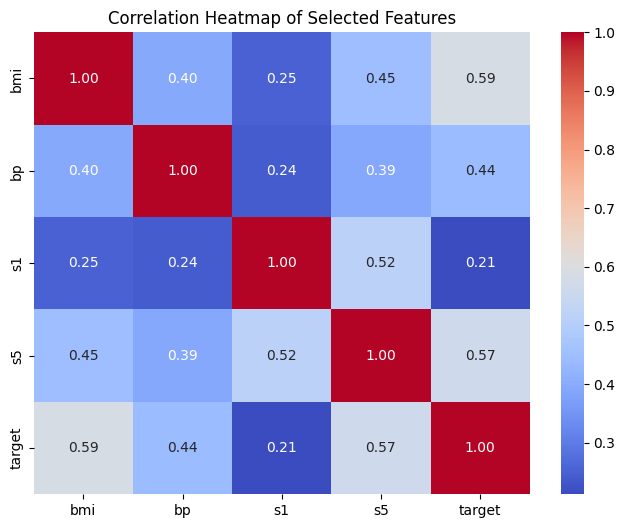

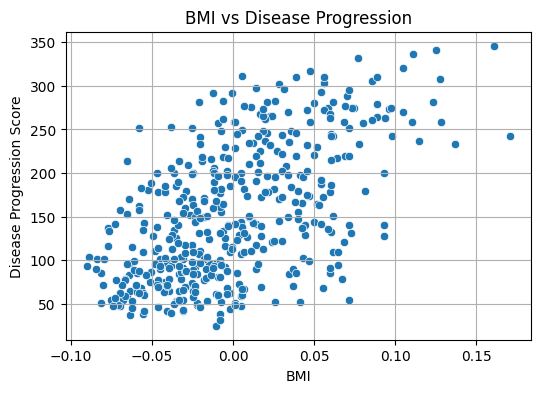

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Step 1: Load the diabetes dataset (real healthcare dataset)
data = load_diabetes()

# Step 2: Convert to a DataFrame for easier visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Disease progression score

# Step 3: Display basic info
print("Dataset shape:", df.shape)
print(df.head())

# Step 4: Visualize a few features
# Example 1: Pairplot of a few selected features
selected_features = ['bmi', 'bp', 's1', 's5', 'target']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle("Pairplot of Selected Healthcare Features", y=1.02)
plt.show()

# Example 2: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# Example 3: Scatter plot of BMI vs disease progression
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='bmi', y='target')
plt.title("BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression Score")
plt.grid(True)
plt.show()


Identify Target and Features

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Sample healthcare dataset
data = pd.DataFrame({
    'Age': [65, 45, 70, 30, 85],
    'Blood_Pressure': [140, 120, 150, 110, 160],
    'Heart_Rate': [90, 85, 95, 70, 100],
    'Chronic_Disease': [1, 0, 1, 0, 1],  # 1 if present, 0 otherwise
    'High_Risk': [1, 0, 1, 0, 1]  # Target variable
})

# Features and target
X = data[['Age', 'Blood_Pressure', 'Heart_Rate', 'Chronic_Disease']]
y = data['High_Risk']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



Convert Categorical Columns to Numerical

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: []


One-Hot Encoding

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

Feature Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sample healthcare data
data = pd.DataFrame({
    'Age': [25, 60, 45, 35, 70],
    'Blood_Sugar': [85, 200, 150, 120, 250],
    'BMI': [22.0, 35.5, 30.0, 28.5, 40.0],
    'Diabetic': [0, 1, 1, 0, 1]
})

# Features before scaling
X = data[['Age', 'Blood_Sugar', 'BMI']]
y = data['Diabetic']

# Apply standard scaling (mean = 0, std = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=['Age', 'Blood_Sugar', 'BMI'])

print("Original Features:\n", X)
print("\nScaled Features:\n", X_scaled_df)


Original Features:
    Age  Blood_Sugar   BMI
0   25           85  22.0
1   60          200  35.5
2   45          150  30.0
3   35          120  28.5
4   70          250  40.0

Scaled Features:
         Age  Blood_Sugar       BMI
0 -1.348907    -1.302623 -1.495194
1  0.797081     0.668451  0.698841
2 -0.122628    -0.188538 -0.195025
3 -0.735767    -0.702731 -0.438807
4  1.410220     1.525440  1.430185


Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Building

In [ ]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)

Evaluation

In [ ]:
# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 0.537777777777773
R2 Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Make Predictions from New Input

In [ ]:
# Sample input (replace values with any other valid values from the original dataset)
new_student = {
'school': 'GP', # 'GP' or 'MS'
'sex': 'F', # 'F' or 'M'
'age': 17, # Integer
'address': 'U', # 'U' or 'R'
'famsize': 'GT3', # 'LE3' or 'GT3'
'Pstatus': 'A', # 'A' or 'T'
'Medu': 4, # 0 to 4
'Fedu': 3, # 0 to 4
'Mjob': 'health', # 'teacher', 'health', etc.
'Fjob': 'services',
'reason': 'course',
'guardian': 'mother',
'traveltime': 2,
'studytime': 3,
'failures': 0,
'schoolsup': 'yes',
'famsup': 'no',
'paid': 'no',
'activities': 'yes',
'nursery': 'yes',
'higher': 'yes',
'internet': 'yes',
'romantic': 'no',
'famrel': 4,
'freetime': 3,
'goout': 3,
'Dalc': 1,
'Walc': 1,
'health': 4,
'absences': 2,
 'G1': 14,
'G2': 15
}

Convert to DataFrame and Encode

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Raw patient data (list of dictionaries)
patient_data = [
    {'Gender': 'Male', 'Smoker': 'Yes', 'Symptom_Severity': 'High', 'Needs_Evaluation': 1},
    {'Gender': 'Female', 'Smoker': 'No', 'Symptom_Severity': 'Low', 'Needs_Evaluation': 0},
    {'Gender': 'Male', 'Smoker': 'No', 'Symptom_Severity': 'Medium', 'Needs_Evaluation': 1},
    {'Gender': 'Female', 'Smoker': 'Yes', 'Symptom_Severity': 'High', 'Needs_Evaluation': 1},
]

# Convert to DataFrame
df = pd.DataFrame(patient_data)

# Encode categorical features
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])               # Male:1, Female:0
df['Smoker'] = encoder.fit_transform(df['Smoker'])               # Yes:1, No:0
df['Symptom_Severity'] = encoder.fit_transform(df['Symptom_Severity'])  # High:0, Low:1, Medium:2 (alphabetical)

# Final encoded DataFrame
print("Encoded DataFrame:\n", df)


Encoded DataFrame:
    Gender  Smoker  Symptom_Severity  Needs_Evaluation
0       1       1                 0                 1
1       0       0                 1                 0
2       1       0                 2                 1
3       0       1                 0                 1


Predict the Final Grade

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Simulated patient health data
data = pd.DataFrame({
    'Age': [25, 50, 35, 60, 40],
    'Hospital_Visits': [1, 5, 2, 6, 3],
    'Medication_Adherence': [9, 4, 8, 3, 7],
    'Exercise_Freq': [5, 1, 4, 0, 3],
    'Final_Health_Grade': [90, 60, 85, 50, 75]  # Target variable
})

# Features and target
X = data[['Age', 'Hospital_Visits', 'Medication_Adherence', 'Exercise_Freq']]
y = data['Final_Health_Grade']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)

# Show predictions
for i, pred in enumerate(predictions):
    print(f"Predicted Final Health Grade for test case {i+1}: {pred:.2f}")


Predicted Final Health Grade for test case 1: 55.00


Deployment-Building an Interactive App

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00


Create a Prediction Function

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample patient data to train on
data = pd.DataFrame({
    'Age': [25, 50, 35, 60, 40],
    'Hospital_Visits': [1, 5, 2, 6, 3],
    'Medication_Adherence': [9, 4, 8, 3, 7],
    'Exercise_Freq': [5, 1, 4, 0, 3],
    'Final_Health_Grade': [90, 60, 85, 50, 75]
})

# Prepare features and target
X = data[['Age', 'Hospital_Visits', 'Medication_Adherence', 'Exercise_Freq']]
y = data['Final_Health_Grade']

# Train the model
model = LinearRegression()
model.fit(X, y)

# 🔮 Define the prediction function
def predict_health_grade(age, visits, adherence, exercise_days):
    input_data = pd.DataFrame([{
        'Age': age,
        'Hospital_Visits': visits,
        'Medication_Adherence': adherence,
        'Exercise_Freq': exercise_days
    }])
    prediction = model.predict(input_data)[0]
    return round(prediction, 2)

# ✅ Example usage
grade = predict_health_grade(age=45, visits=2, adherence=8, exercise_days=4)
print(f"Predicted Final Health Grade: {grade}")


Predicted Final Health Grade: 86.25


Create the Gradio Interface

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import gradio as gr

# Training dataset
data = pd.DataFrame({
    'Age': [25, 50, 35, 60, 40],
    'Hospital_Visits': [1, 5, 2, 6, 3],
    'Medication_Adherence': [9, 4, 8, 3, 7],
    'Exercise_Freq': [5, 1, 4, 0, 3],
    'Final_Health_Grade': [90, 60, 85, 50, 75]
})

# Train model
X = data[['Age', 'Hospital_Visits', 'Medication_Adherence', 'Exercise_Freq']]
y = data['Final_Health_Grade']
model = LinearRegression()
model.fit(X, y)

# Prediction function
def predict_health_grade(age, visits, adherence, exercise):
    input_df = pd.DataFrame([{
        'Age': age,
        'Hospital_Visits': visits,
        'Medication_Adherence': adherence,
        'Exercise_Freq': exercise
    }])
    prediction = model.predict(input_df)[0]
    return f"Predicted Final Health Grade: {round(prediction, 2)}"

# Gradio interface
iface = gr.Interface(
    fn=predict_health_grade,
    inputs=[
        gr.Slider(18, 100, label="Age"),
        gr.Slider(0, 10, step=1, label="Hospital Visits"),
        gr.Slider(0, 10, label="Medication Adherence (0-10)"),
        gr.Slider(0, 7, step=1, label="Exercise Frequency (days/week)")
    ],
    outputs="text",
    title="AI-Powered Health Grade Predictor",
    description="Enter patient details to predict final health grade based on health habits and medical history."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2a5f1549cfd1ca93a4.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
